In [112]:
path = '/tmp/wrf_management/data_folder/runs/run_2019_02_20/2017_12_02/metgrid/'

In [113]:
import os
fls = os.listdir(path)
df = pd.DataFrame(fls,columns=['names'])
df = df[df.names.str.startswith('met_em.d')]
df['dom']=df.names.str.extract(r'd0(.)\.').astype(int)
df = df.sort_values('dom')
df['path']=df.names.apply(
    lambda n: os.path.join(path,n)
)
df = df.sort_values('names')

In [114]:
p = df[df.dom==3].iloc[-1].path

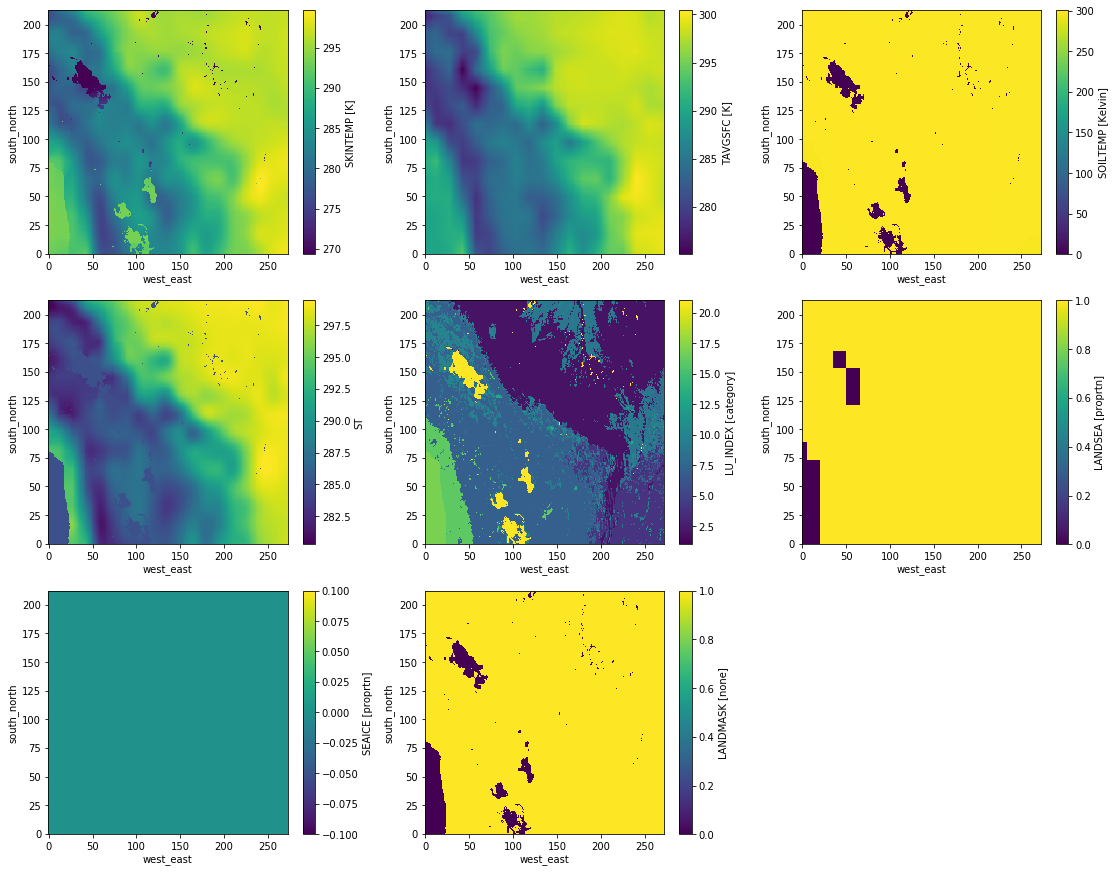

In [115]:
cols = [
    'SKINTEMP','TAVGSFC','SOILTEMP',
    'ST','LU_INDEX','LANDSEA','SEAICE','LANDMASK'
]
skim = ['ST']
ar = xr.open_dataset(p)
lcols = len(cols)
fx, fy = 3, 10
ic = 4
fig = plt.figure(1,figsize=(ic*fx * (1.3),ic*fy))
for i in range(lcols):
    col = cols[i]
    ax = fig.add_subplot(fy,fx,i+1)
    to_pl=ar[col]
    if col in skim:
        to_pl=to_pl[0][0]
    to_pl.plot(ax=ax)
fig.set_tight_layout('pad')
import warnings
warnings.filterwarnings('ignore')

In [102]:
list(ar.variables)

['Times',
 'PRES',
 'SOIL_LAYERS',
 'SM',
 'ST',
 'GHT',
 'PMSL',
 'SNOW',
 'SKINTEMP',
 'SOILHGT',
 'LANDSEA',
 'SEAICE',
 'ST100200',
 'ST040100',
 'ST010040',
 'ST000010',
 'SM100200',
 'SM040100',
 'SM010040',
 'SM000010',
 'PSFC',
 'RH',
 'VV',
 'UU',
 'TT',
 'TAVGSFC',
 'VAR_SSO',
 'OL4',
 'OL3',
 'OL2',
 'OL1',
 'OA4',
 'OA3',
 'OA2',
 'OA1',
 'VAR',
 'CON',
 'SNOALB',
 'LAI12M',
 'GREENFRAC',
 'ALBEDO12M',
 'SCB_DOM',
 'SOILCBOT',
 'SCT_DOM',
 'SOILCTOP',
 'SOILTEMP',
 'HGT_M',
 'LU_INDEX',
 'LANDUSEF',
 'COSALPHA_V',
 'SINALPHA_V',
 'COSALPHA_U',
 'SINALPHA_U',
 'XLONG_C',
 'XLAT_C',
 'LANDMASK',
 'COSALPHA',
 'SINALPHA',
 'F',
 'E',
 'MAPFAC_UY',
 'MAPFAC_VY',
 'MAPFAC_MY',
 'MAPFAC_UX',
 'MAPFAC_VX',
 'MAPFAC_MX',
 'MAPFAC_U',
 'MAPFAC_V',
 'MAPFAC_M',
 'CLONG',
 'CLAT',
 'XLONG_U',
 'XLAT_U',
 'XLONG_V',
 'XLAT_V',
 'XLONG_M',
 'XLAT_M']

In [103]:
ar

<xarray.Dataset>
Dimensions:      (Time: 1, num_metgrid_levels: 38, num_sm_layers: 4, num_st_layers: 4, south_north: 213, south_north_stag: 214, west_east: 273, west_east_stag: 274, z-dimension0012: 12, z-dimension0016: 16, z-dimension0021: 21)
Dimensions without coordinates: Time, num_metgrid_levels, num_sm_layers, num_st_layers, south_north, south_north_stag, west_east, west_east_stag, z-dimension0012, z-dimension0016, z-dimension0021
Data variables:
    Times        (Time) |S19 ...
    PRES         (Time, num_metgrid_levels, south_north, west_east) float32 ...
    SOIL_LAYERS  (Time, num_st_layers, south_north, west_east) float32 ...
    SM           (Time, num_sm_layers, south_north, west_east) float32 ...
    ST           (Time, num_st_layers, south_north, west_east) float32 ...
    GHT          (Time, num_metgrid_levels, south_north, west_east) float32 ...
    PMSL         (Time, south_north, west_east) float32 ...
    SNOW         (Time, south_north, west_east) float32 ...
    S

In [116]:
path = '/tmp/wrf_management/data_folder/runs/run_2019_02_20/2017_12_02/real/'

In [117]:
import os
fls = os.listdir(path)
df = pd.DataFrame(fls,columns=['names'])
df = df[df.names.str.startswith('wrfinput_')]
df['dom']=df.names.str.extract(r'd0(.)').astype(int)
df = df.sort_values('dom')
df['path']=df.names.apply(
    lambda n: os.path.join(path,n)
)
df

,names,dom,path
11,wrfinput_d01,1,/tmp/wrf_management/data_folder/runs/run_2019_...
19,wrfinput_d02,2,/tmp/wrf_management/data_folder/runs/run_2019_...
8,wrfinput_d03,3,/tmp/wrf_management/data_folder/runs/run_2019_...
12,wrfinput_d04,4,/tmp/wrf_management/data_folder/runs/run_2019_...


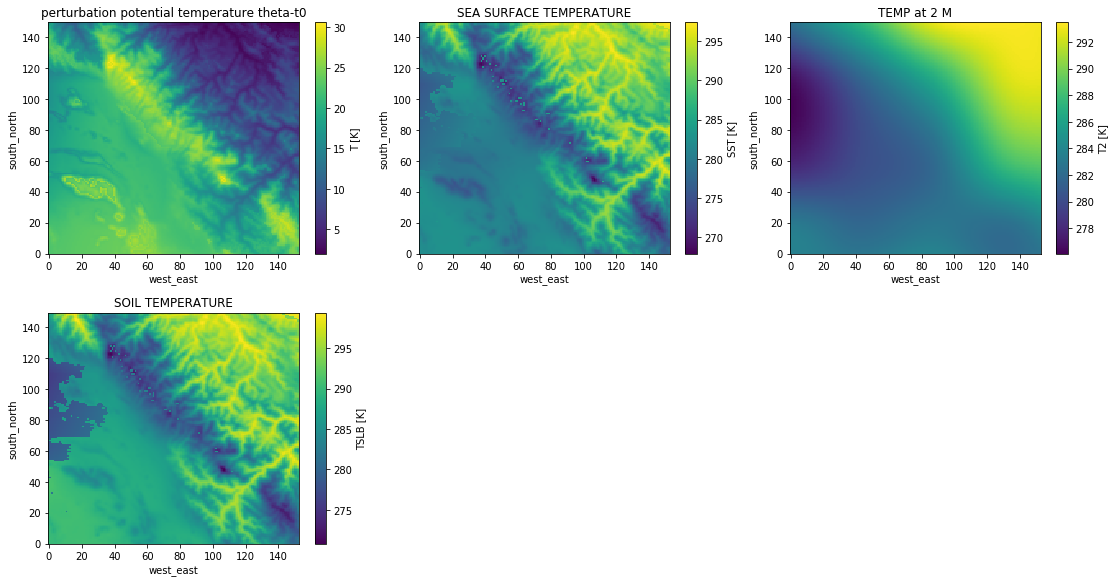

In [118]:
p = df[df.dom==4].iloc[0].path

cols = [
    'T','SST','T2','TSLB'
]
skim = ['T','TSLB']
ar = xr.open_dataset(p)
lcols = len(cols)
fx, fy = 3, 10
ic = 4
fig = plt.figure(1,figsize=(ic*fx * (1.3),ic*fy))
for i in range(lcols):
    col = cols[i]
    ax = fig.add_subplot(fy,fx,i+1)
    to_pl=ar[col]
    if col in skim:
        to_pl=to_pl[0][0]
    to_pl.plot(ax=ax)
    ax.set_title(ar[col].description)
fig.set_tight_layout('pad')
import warnings
warnings.filterwarnings('ignore')

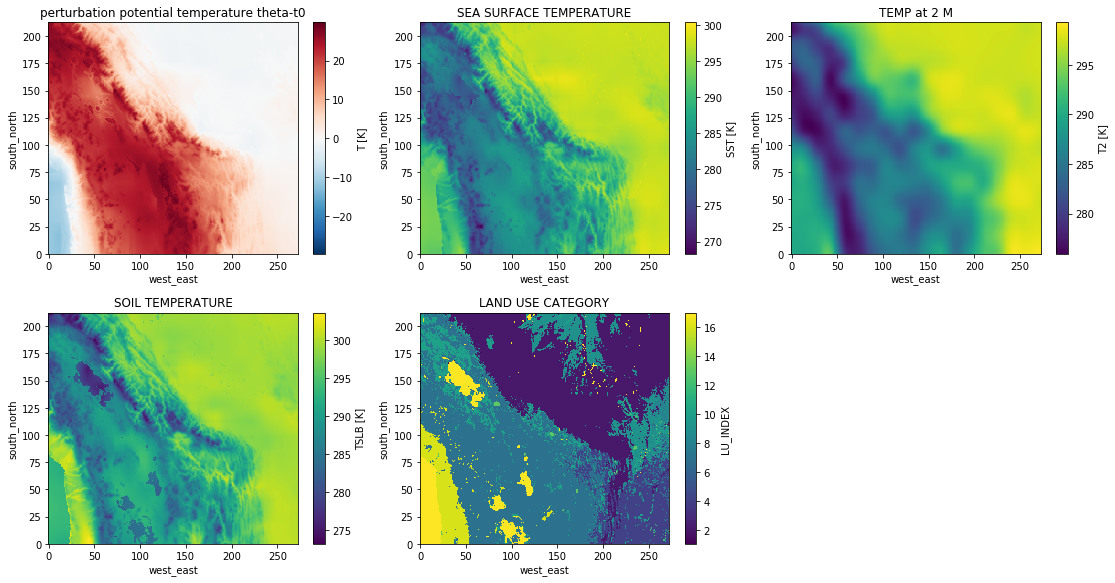

In [119]:
p = df[df.dom==3].iloc[0].path

cols = [
    'T','SST','T2','TSLB','LU_INDEX'
]
skim = ['T','TSLB']
ar = xr.open_dataset(p)
lcols = len(cols)
fx, fy = 3, 10
ic = 4
fig = plt.figure(1,figsize=(ic*fx * (1.3),ic*fy))
for i in range(lcols):
    col = cols[i]
    ax = fig.add_subplot(fy,fx,i+1)
    to_pl=ar[col]
    if col in skim:
        to_pl=to_pl[0][0]
    to_pl.plot(ax=ax)
    ax.set_title(ar[col].description)
fig.set_tight_layout('pad')
import warnings
warnings.filterwarnings('ignore')

In [87]:
list(ar.variables)

['Times',
 'XLAT',
 'XLONG',
 'LU_INDEX',
 'ZNU',
 'ZNW',
 'ZS',
 'DZS',
 'VAR_SSO',
 'EROD',
 'U',
 'V',
 'W',
 'PH',
 'PHB',
 'T',
 'THM',
 'T_INIT',
 'MU',
 'MUB',
 'P',
 'PB',
 'FNM',
 'FNP',
 'RDNW',
 'RDN',
 'DNW',
 'DN',
 'T_BASE',
 'CFN',
 'CFN1',
 'STEP_NUMBER',
 'THIS_IS_AN_IDEAL_RUN',
 'P_HYD',
 'Q2',
 'T2',
 'TH2',
 'PSFC',
 'U10',
 'V10',
 'RDX',
 'RDY',
 'DTS',
 'DTSEPS',
 'RESM',
 'ZETATOP',
 'CF1',
 'CF2',
 'CF3',
 'QVAPOR',
 'QCLOUD',
 'QRAIN',
 'QICE',
 'QSNOW',
 'QGRAUP',
 'FCX',
 'GCX',
 'TOPOSLPX',
 'TOPOSLPY',
 'SHDMAX',
 'SHDMIN',
 'SNOALB',
 'LANDUSEF',
 'SOILCTOP',
 'SOILCBOT',
 'TSLB',
 'SMOIS',
 'SH2O',
 'SMCREL',
 'SEAICE',
 'IVGTYP',
 'ISLTYP',
 'VEGFRA',
 'SNOW',
 'SNOWH',
 'CANWAT',
 'FNDSNOWH',
 'FNDSOILW',
 'FNDALBSI',
 'FNDSNOWSI',
 'FNDICEDEPTH',
 'LAKE_DEPTH',
 'UOCE',
 'VOCE',
 'FRC_URB2D',
 'LAI',
 'VAR',
 'CON',
 'OA1',
 'OA2',
 'OA3',
 'OA4',
 'OL1',
 'OL2',
 'OL3',
 'OL4',
 'MAPFAC_M',
 'MAPFAC_U',
 'MAPFAC_V',
 'MAPFAC_MX',
 'MAPFAC_MY',
 'MAPF

In [94]:
ar['TSLB'].description

'SOIL TEMPERATURE'

In [121]:
ar.Times

<xarray.DataArray 'Times' (Time: 1)>
array([b'2017-12-02_00:00:00'], dtype='|S19')
Dimensions without coordinates: Time